# Tarea Semanal N°7
### Autor: Gonzalo Goumaz

## Punto 1
realizar los ejercicios 2 y 3 de la guía correspondiente a filtros digitales.

### Ejercicio 2 de la guía
Se desea emular digitalmente la característica de un filtro analógico pasa bajos Butterworth de orden 2, con $f_c = 1kHz$.
1. Para y aplicando transformación bilineal, obtener un filtro con respuesta𝑓𝑠 = 100 𝑘𝐻𝑧
cuyo comportamiento emule al Butterworth analógico.𝐻(𝑧)
Trazar la respuesta en frecuencia de módulo y fase de ambos filtros sobre un mismo
gráfico para establecer comparaciones.
1. Repetir el punto anterior para .𝑓𝑠 = 10 𝑘𝐻𝑧
1. Repetir los puntos A) y B) si se desea emular digitalmente la característica de un filtro
analógico pasa altos Butterworth de orden 2, con 𝑓𝑐 = 6 𝑘𝐻𝑧
1. Indique en cuál de los 3 casos ( A, B ó C ) justificaría rediseñar aplicando prewarping. Explique el motivo en pocas palabras.

In [1]:
from IPython.display import IFrame
IFrame("TS7_guia_ej2.pdf", width = 900, height = 900)

In [2]:
import sympy as sp
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
import pytc2.sistemas_lineales as tc2
from pytc2.general import print_latex

In [3]:
# Para fijar el estilo de gráficos en el notebook

fig_sz_x = 13
fig_sz_y = 10
fig_dpi = 80
fig_font_size = 12

plt.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
plt.rcParams['figure.dpi'] = (fig_dpi)
plt.rcParams.update({'font.size':fig_font_size})

In [4]:
##  Resolución simbólica  ##

S, Z = sp.symbols("S Z", complex=True)
k = sp.symbols("k", real=True, positive=True)

Hs = 1/(S**2+S*sp.sqrt(2)+1)

f_bi = k * (Z-1)/(Z+1)

Hz = sp.collect(sp.simplify(sp.expand(Hs.subs(S, f_bi))),Z)

print("Función de transferencia del filtro analógico butterworth de segundo orden:")
print_latex('H(S)='+ sp.latex(Hs))
print("Función de transferencia del filtro digital asociado:")
print_latex('H(Z)='+ sp.latex(Hz))

## ---------------------- ##

Función de transferencia del filtro analógico butterworth de segundo orden:


<IPython.core.display.Math object>

Función de transferencia del filtro digital asociado:


<IPython.core.display.Math object>

In [5]:
## Defino función que resuelve el filtro para las frecuencias indicadas

def ejercicio_2(fc, fs):
    
    ## Normalizo sobre la frecuencia de corte
    norma = fc
    fc = fc/norma
    fs = fs/norma

    ## Genero el filtro analógico

    z,p,k = sig.buttap(2)
    z,p,k = sig.lp2lp_zpk(z, p, k, wo=2*np.pi*fc)

    num_s, den_s = sig.zpk2tf(z, p, k)
    tf_s = sig.TransferFunction(num_s, den_s)

    ## Genero la transferencia del filtro digital

    num_z, den_z = sig.bilinear(num_s, den_s ,fs=fs)
    tf_z = sig.TransferFunction(num_z, den_z, dt=1/fs)

    ## Analizo las funciones

    plt.close('all')

    wrad_z, hh_z = sig.freqz(num_z, den_z)
    ww_z = wrad_z / np.pi

    plt.figure(1)
    
    ## Plot de respuesta de módulo
    plt.subplot(2, 1, 1)
    plt.grid(visible=True)
    plt.title("Module response")
    plt.ylabel("Module [dB]")
    plt.plot(ww_z, 20* np.log10(abs(hh_z)), color ='r', label='Second Order Digital Butterworth')

    axes_hdl = plt.gca()
    axes_hdl.legend()

    ## Plot de respuesta de fase
    plt.subplot(2, 1, 2)
    plt.grid(visible=True)
    plt.title("Phase response")
    plt.ylabel("Phase [deg]")
    plt.xlabel("Normalized Frequency [fs/2]")
    plt.plot(ww_z, np.angle(hh_z, deg=True) , color ='r', label='Second Order Digital Butterworth')

    axes_hdl = plt.gca()
    axes_hdl.legend()
    
    # Mapa de polos y ceros
    tc2.pzmap(tf_z, annotations=True ,filter_description="Second Order Digital Butterworth",fig_id=2 , digital=True)


    ## --------------------- ##

#### Ejercicio 2.1
Se simula para una $f_c = 1kHz$ con una frecuencia de muestreo $f_s = 100kHz$.

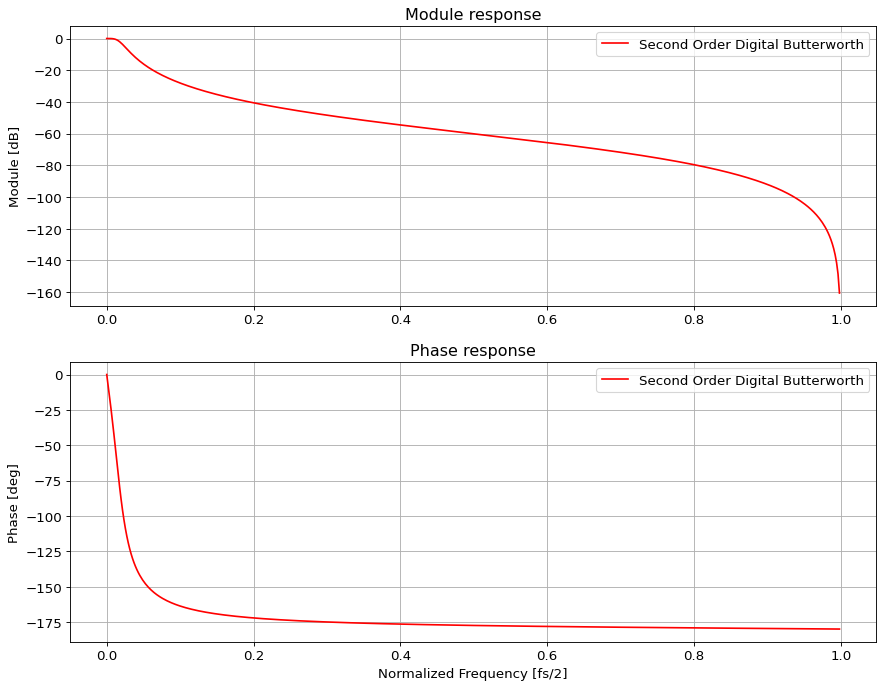

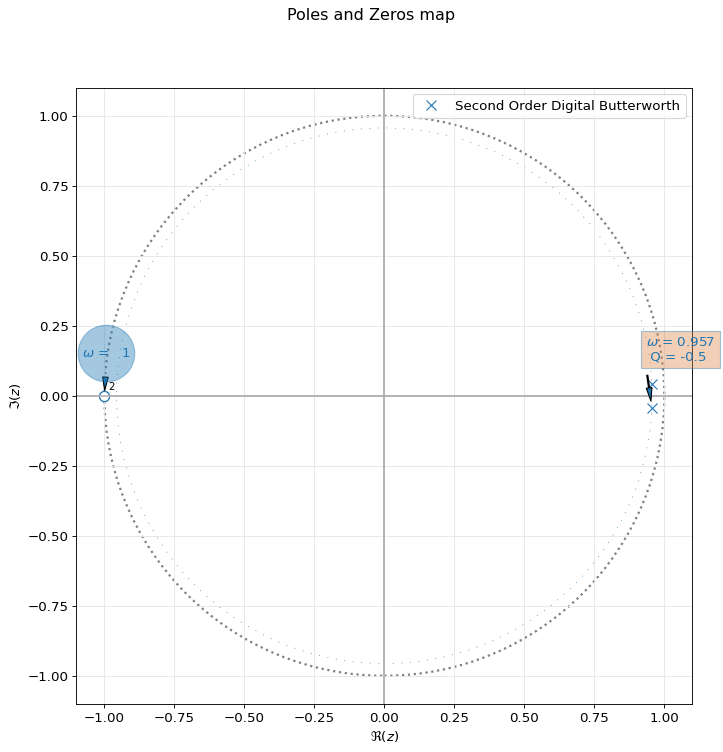

In [6]:
## -Resolución numérica- ##

# Defino datos de consigna

fc = 1e3
fs = 100e3

ejercicio_2(fc, fs)

#### Ejercicio 2.2
Se simula para una $f_c = 1kHz$ con una frecuencia de muestreo $f_s = 10kHz$.

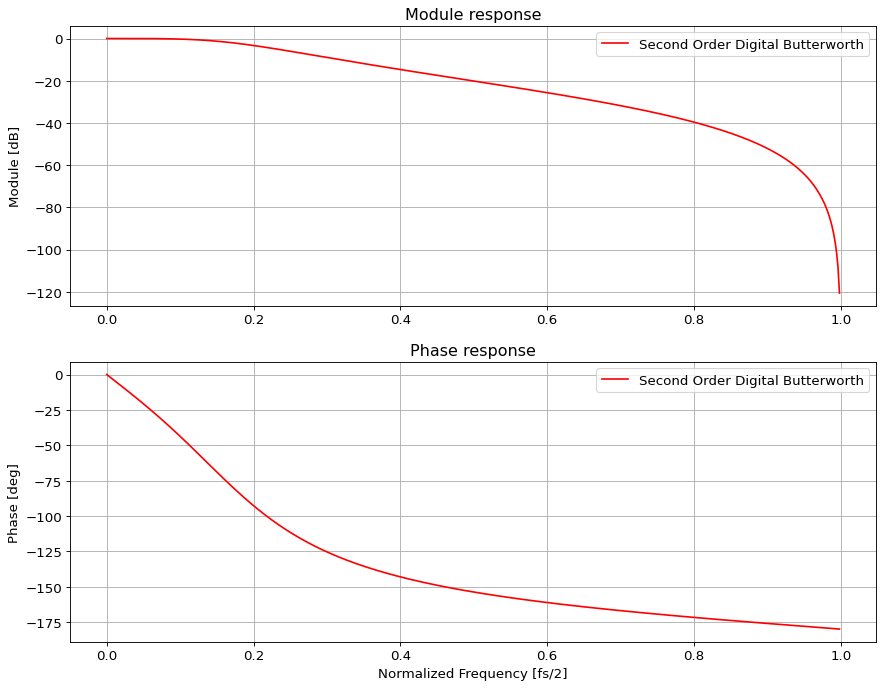

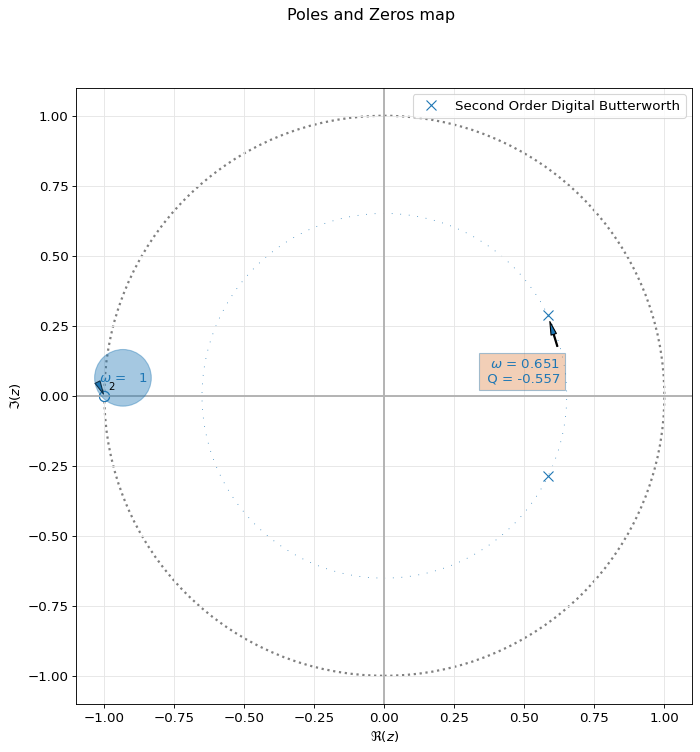

In [7]:
# Defino datos de consigna

fc = 1e3
fs = 10e3

ejercicio_2(fc, fs)

#### Ejercicio 2.3.1
Se simula para una $f_c = 6kHz$ con una frecuencia de muestreo $f_s = 100kHz$.

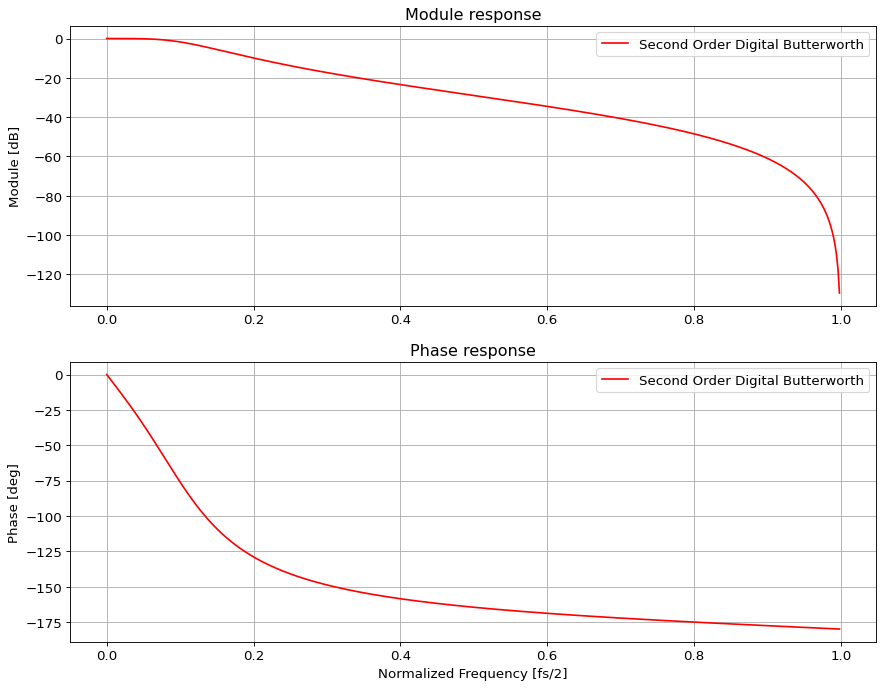

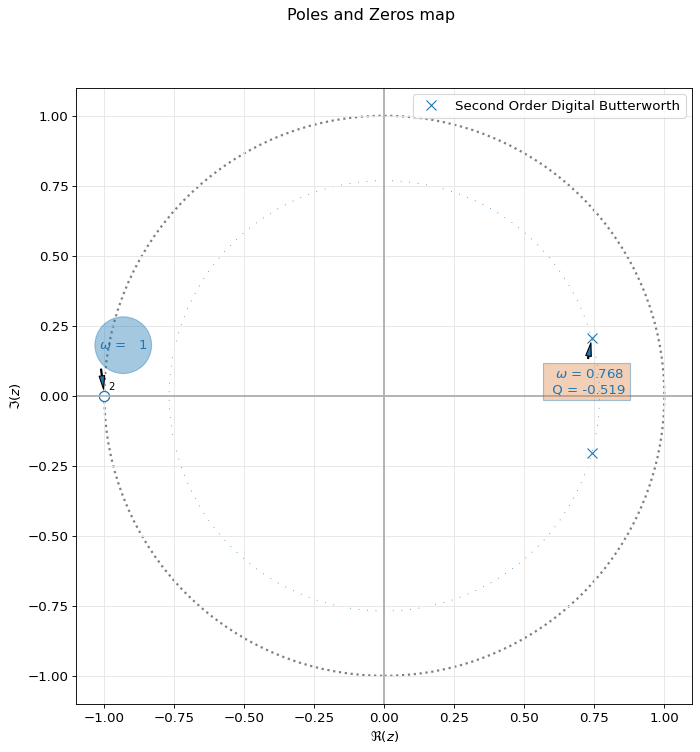

In [8]:
# Defino datos de consigna

fc = 6e3
fs = 100e3

ejercicio_2(fc, fs)

#### Ejercicio 2.3.2
Se simula para una $f_c = 6kHz$ con una frecuencia de muestreo $f_s = 10kHz$.

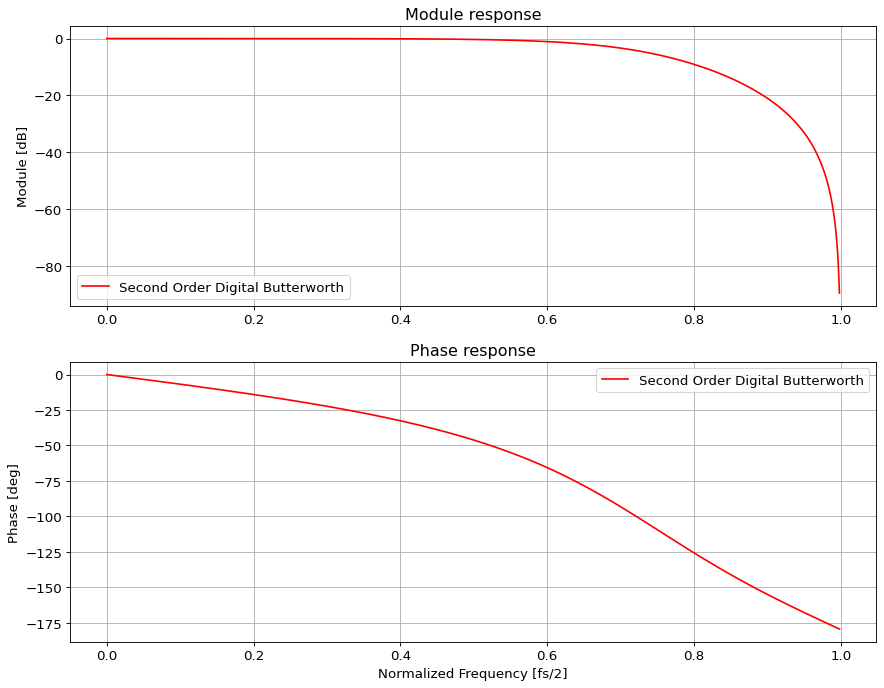

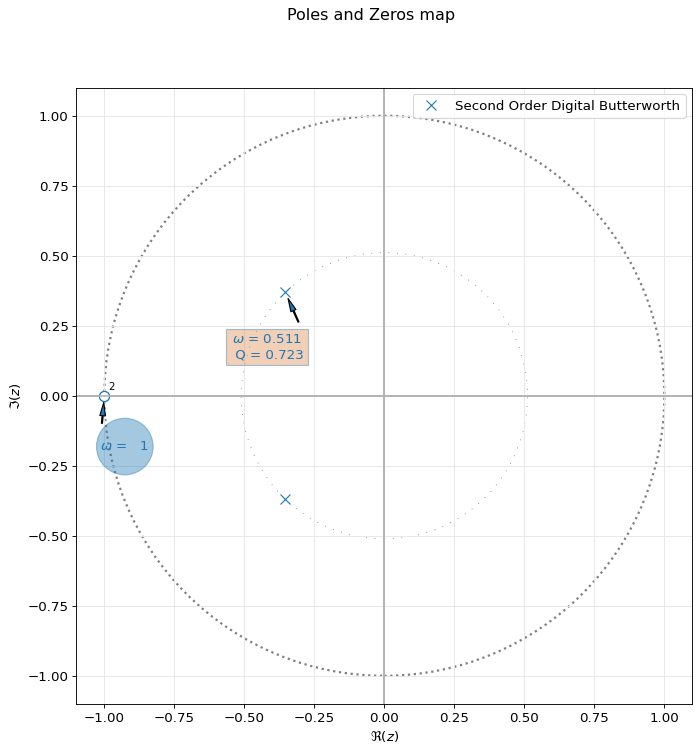

In [9]:
# Defino datos de consigna

fc = 6e3
fs = 10e3

ejercicio_2(fc, fs)

#### Ejercicio 2.4
Dadas las simulaciones anteriores se observa que el sistema está sobremuestreado no es necesario aplicar prewarping.
Para el caso en donde la frecuencia de corte es de $f_c = 6kHz$ y la frecuencia de sampling es $f_s = 10kHz$ sería necesario aplicar prewarping.

### Ejercicio 3 de la guía
Dadas las siguientes respuestas al impulso se pide:
+ Obtener la Transferencia del sistema $H(Z)$
+ Obtener las singularidades en el plano $Z$
+ Obtener la respuesta de módulo y fase

#### a) Filtros de media móvil
\begin{equation}
    h_1(k) = \left(1,1 \right)
\end{equation}

\begin{equation}
    h_2(k) = \left(1,1,1 \right)
\end{equation}

1. ¿Qué modificación debería implementarse para que la salida represente la media aritmética?
2. Para el último sistema, ¿Qué frecuencia de muestreo se debería adoptar si se quisiera eliminar con dicho filtro la interferencia causada por la interferencia de línea de 50 Hz?

In [10]:
from IPython.display import IFrame
IFrame("./ej3/TS7_guia_ej3-A.pdf", width = 900, height = 900)

(2, <Axes: xlabel='$\\Re(z)$', ylabel='$\\Im(z)$'>)

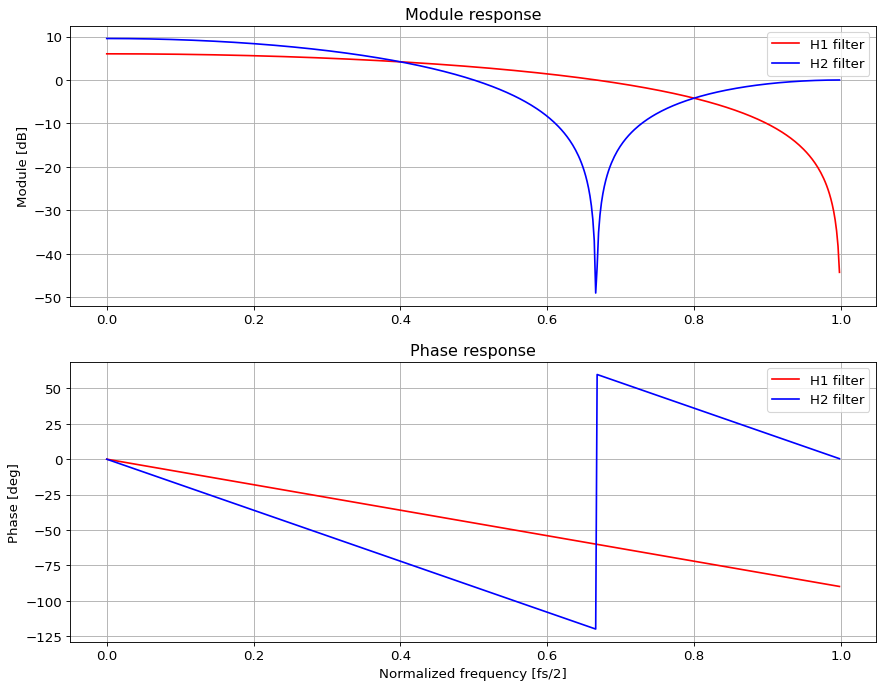

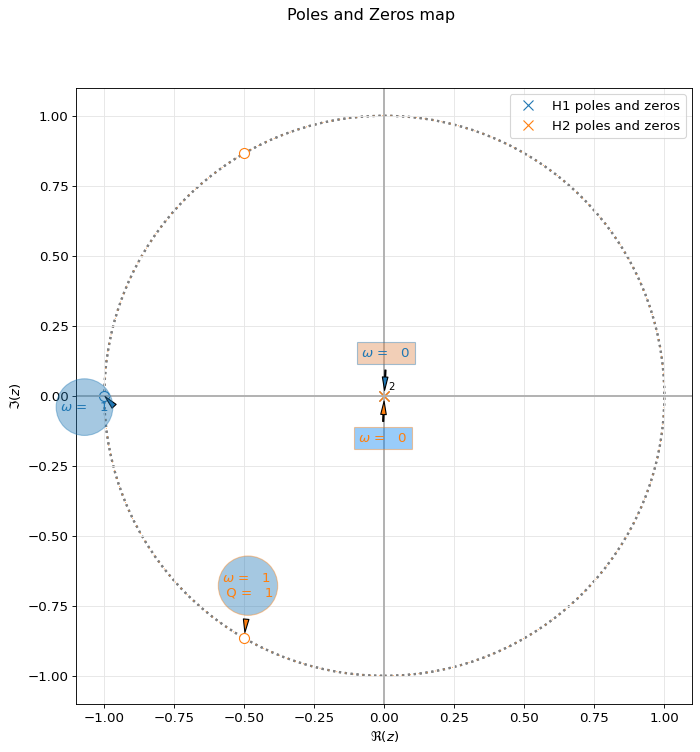

In [11]:
## Frecuencia de sampling y normalización

fs = 1e3
norma = fs/2
fs = fs/norma

## -- Filtros de media móvil -- ##

# Coeficientes para h1

bn1 = np.array([1, 1])
an1 = np.array([1, 0])

# Coeficientes para h2

bn2 = np.array([1, 1, 1])
an2 = np.array([1, 0, 0])

# Armo la transferencia

H1 = sig.TransferFunction(bn1, an1, dt=1/fs)
H2 = sig.TransferFunction(bn2, an2, dt=1/fs)

WW_Z, HH_1 = sig.freqz(bn1, an1, fs=fs)
_, HH_2  = sig.freqz(bn2, an2, fs=fs)

# Grafico respuesta de módulo
plt.close('all')
plt.figure(1)

plt.subplot(2, 1, 1)
plt.grid(visible=True)
plt.title("Module response")
plt.ylabel("Module [dB]")
plt.plot(WW_Z, 20* np.log10(abs(HH_1)), color ='r', label='H1 filter')
plt.plot(WW_Z, 20* np.log10(abs(HH_2)), color ='b', label='H2 filter')

axes_hdl = plt.gca();
axes_hdl.legend();

# Grafico respuesta de fase

plt.subplot(2, 1, 2)
plt.grid(visible=True)
plt.title("Phase response")
plt.ylabel("Phase [deg]")
plt.xlabel("Normalized frequency [fs/2]")
plt.plot(WW_Z, np.angle(HH_1, deg=True) , color ='r', label='H1 filter')
plt.plot(WW_Z, np.angle(HH_2, deg=True) , color ='b', label='H2 filter')

axes_hdl = plt.gca()
axes_hdl.legend()

# Mapa de polos y ceros
tc2.pzmap(H1, annotations=True ,filter_description="H1 poles and zeros",fig_id=2 , digital=True)
tc2.pzmap(H2, annotations=True ,filter_description="H2 poles and zeros",fig_id=2, digital=True)

## ---------------------------- ##

#### a) Filtros diferenciadores
\begin{equation}
    h_1(k) = \left(1,-1 \right)
\end{equation}

\begin{equation}
    h_2(k) = \left(1,0,-1 \right)
\end{equation}

1. ¿Qué demora introducen ambos sistemas?
2. ¿Hasta qué frecuencias estos sistemas se comportan como un derivador ideal?, Considere una tolerancia admisible del 5% respecto a su respuesta ideal $\left|H(\Omega)\right|=\Omega$

In [12]:
from IPython.display import IFrame
IFrame("./ej3/TS7_guia_ej3-B.pdf", width = 900, height = 900)

/tmp/ipykernel_26285/3952702110.py:28: RuntimeWarning: divide by zero encountered in log10
  plt.plot(WW_Z, 20* np.log10(abs(HH_1)), color ='r', label='H1 filter')
/tmp/ipykernel_26285/3952702110.py:29: RuntimeWarning: divide by zero encountered in log10
  plt.plot(WW_Z, 20* np.log10(abs(HH_2)), color ='b', label='H2 filter')


(4, <Axes: xlabel='$\\Re(z)$', ylabel='$\\Im(z)$'>)

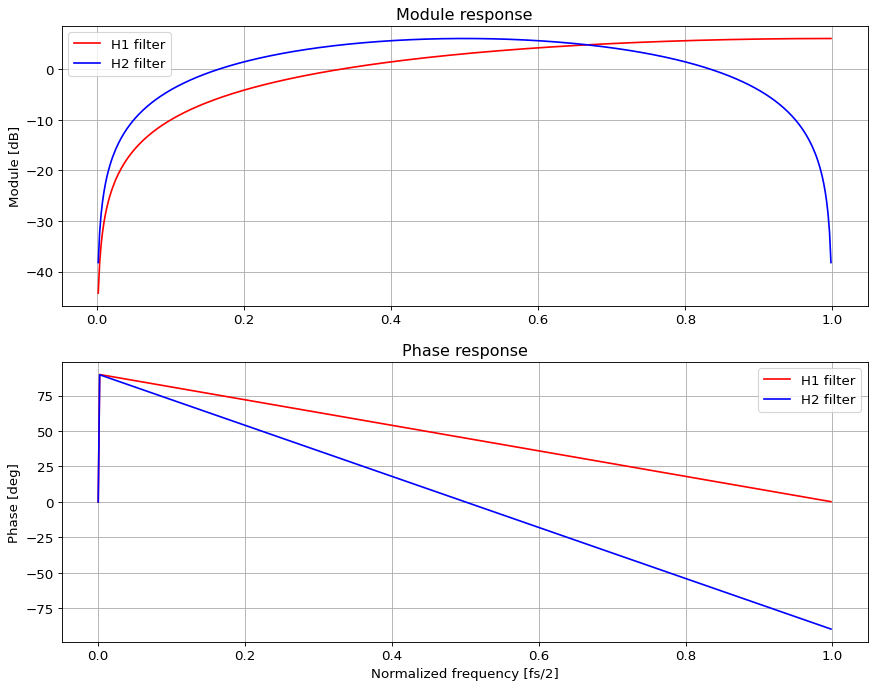

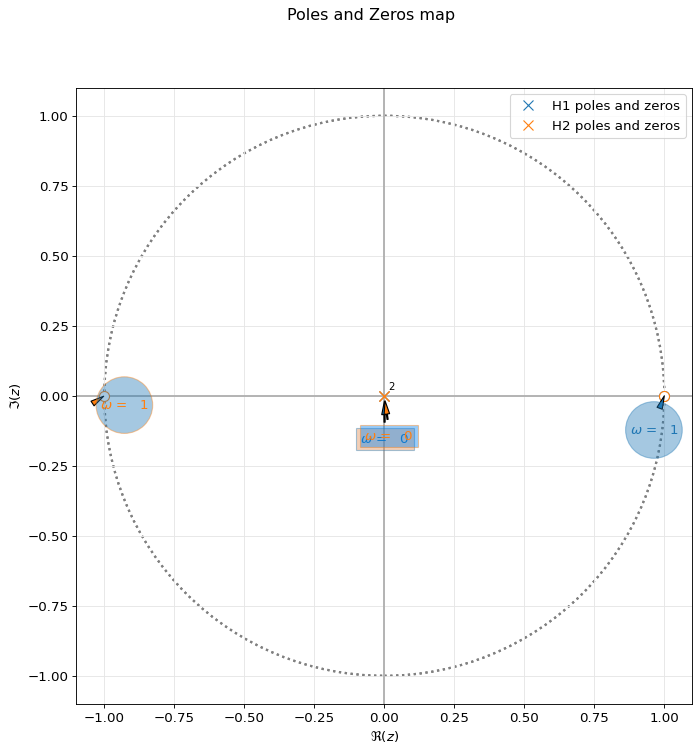

In [13]:
## - Filtros diferenciadores -  ##

# Coeficientes para h1

bn1 = np.array([1, -1])
an1 = np.array([1, 0])

# Coeficientes para h2

bn2 = np.array([1, 0 ,-1])
an2 = np.array([1, 0, 0])

# Armo la tarnsferencia

H1 = sig.TransferFunction(bn1, an1, dt=1/fs)
H2 = sig.TransferFunction(bn2, an2, dt=1/fs)

WW_Z, HH_1 = sig.freqz(bn1, an1, fs=fs)
_, HH_2  = sig.freqz(bn2, an2, fs=fs)

# Grafico respuesta de módulo
plt.figure(3)

plt.subplot(2, 1, 1)
plt.grid(visible=True)
plt.title("Module response")
plt.ylabel("Module [dB]")
plt.plot(WW_Z, 20* np.log10(abs(HH_1)), color ='r', label='H1 filter')
plt.plot(WW_Z, 20* np.log10(abs(HH_2)), color ='b', label='H2 filter')

axes_hdl = plt.gca()
axes_hdl.legend()

# Grafico respuesta de fase

plt.subplot(2, 1, 2)
plt.grid(visible=True)
plt.title("Phase response")
plt.ylabel("Phase [deg]")
plt.xlabel("Normalized frequency [fs/2]")
plt.plot(WW_Z, np.angle(HH_1, deg=True) , color ='r', label='H1 filter')
plt.plot(WW_Z, np.angle(HH_2, deg=True) , color ='b', label='H2 filter')

axes_hdl = plt.gca()
axes_hdl.legend()

# Mapa de polos y ceros
tc2.pzmap(H1, annotations=True ,filter_description="H1 poles and zeros",fig_id=4 , digital=True)
tc2.pzmap(H2, annotations=True ,filter_description="H2 poles and zeros",fig_id=4, digital=True)
## ---------------------------- ##


Tanto para las simulaciones de los filtros de media móvil como para los diferenciadores, se observa que los resultados de la simulación son congruentes con lo expuesto en el desarrollo teórico.

## Punto 2
Se dispone del siguiente filtro digital:
<figure>
<center>
<img src="images/punto2.png">
<figcaption> Fig x: Diagrama en bloques del sistema propuesto.</figcaption>
</figure>

1. Para la transferencia del filtro con $M=2$ y $\alpha=0.8$ se pide calcular el diagrama de polos y ceros, la respuesta de módulo y fase y el retardo de grupo.
2. Se quiere anular una senoidal interferente de 125 Hz y su segunda armónica, y sólo se dispones de un sumador y el filtro de la figura con $M=4$. Proponga un esquema de la solución y calcule los parámetros del filtro que sería necesario adecuar.

In [14]:
from IPython.display import IFrame
IFrame("TS7_Punto2.pdf", width = 900, height = 900)

### Simulación en Python
Con el objetivo de verificar lo expuesto en la práctica, se desarrolló el siguiente script de python en el que se grafica para ámbos casos, la respuesta de módulo y fase y el diagrama de polos y ceros.

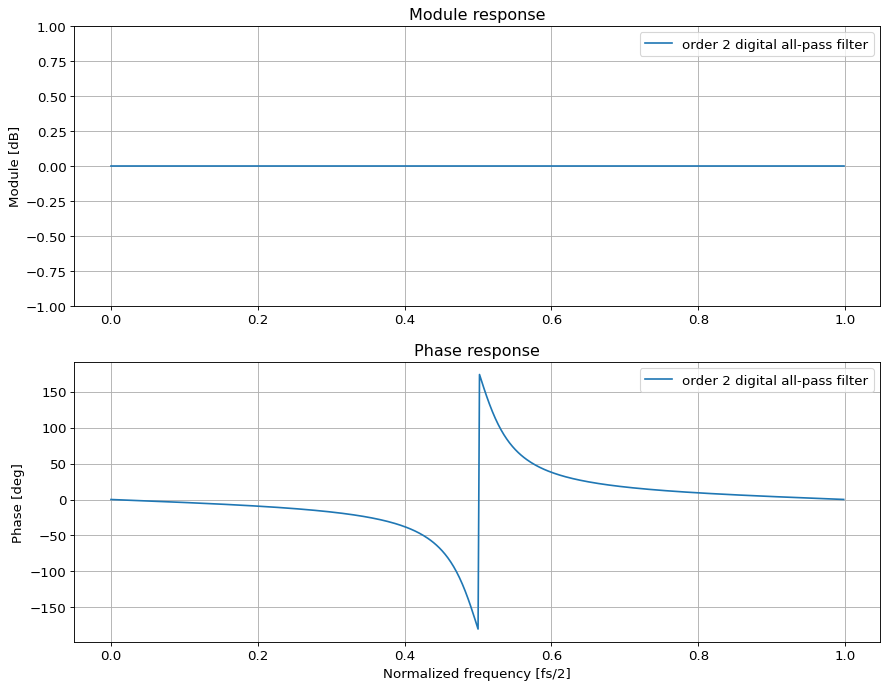

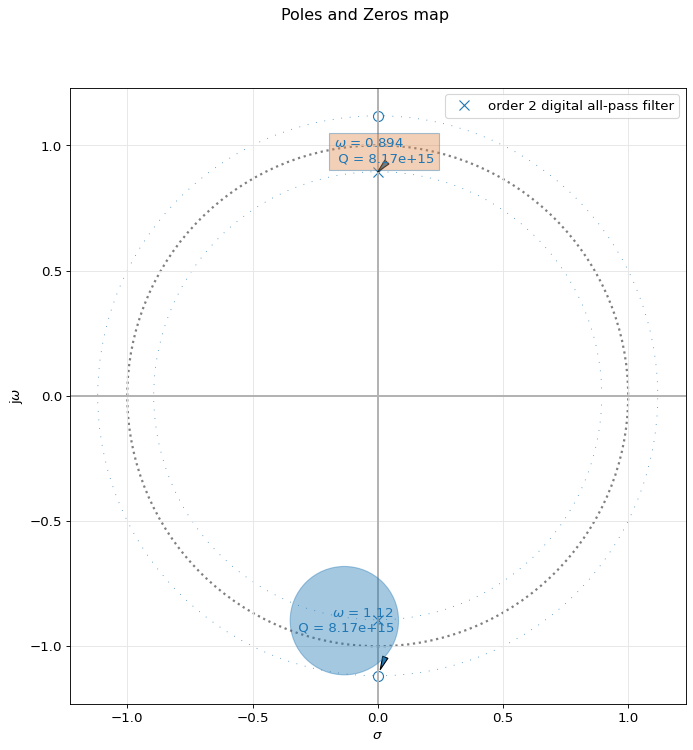

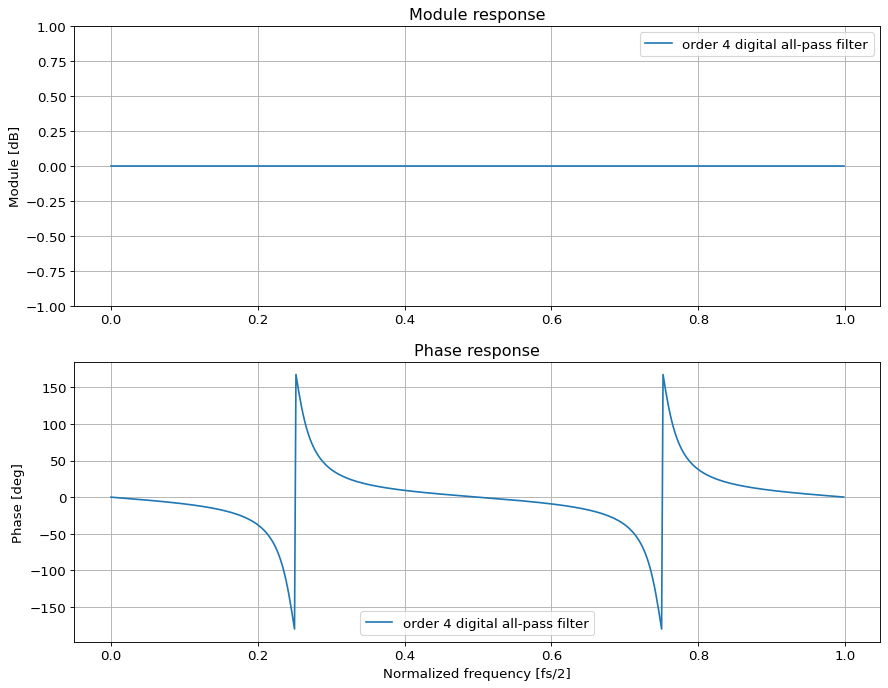

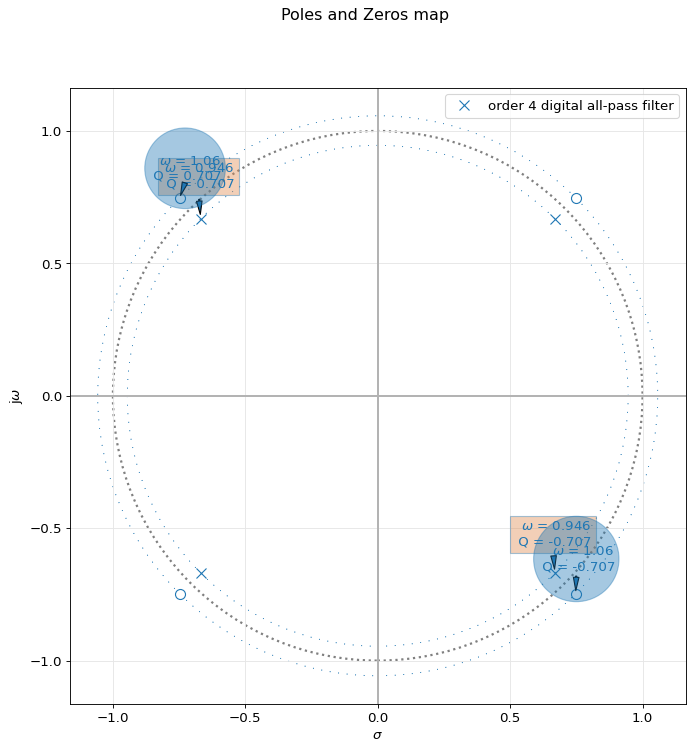

In [15]:
## --- Parámetros del filtro ---- ##

fs = 10e3
fs /= fs/2 #normalizada
N = [2 , 4]
alpha = 0.8
i = 0
## ------- Implementación ------- ##

plt.close('all')

while i<2:
    
    bn = np.zeros_like(np.arange(N[i] + 1) , dtype=float)
    an = np.zeros_like(np.arange(N[i] + 1) , dtype=float)
    
    bn[0]  = alpha
    bn[-1] = 1
    
    an[0]  = 1
    an[-1] = alpha
    
    tf = sig.TransferFunction(bn, an)
    WW_Z, HH_Z = sig.freqz(bn, an, fs=fs)
    
    # Grafico de respuesta de módulo
    
    plt.figure(i)
    
    plt.subplot(2, 1, 1)
    plt.grid(visible=True)
    plt.title("Module response")
    plt.ylabel("Module [dB]")
    plt.plot(WW_Z, 20* np.log10(abs(HH_Z)), label=f'order {N[i]} digital all-pass filter')
    plt.ylim(-1, 1)
    axes_hdl = plt.gca()
    axes_hdl.legend()
    
    # Grafico respuesta de fase
    
    plt.subplot(2, 1, 2)
    plt.grid(visible=True)
    plt.title("Phase response")
    plt.ylabel("Phase [deg]")
    plt.xlabel("Normalized frequency [fs/2]")
    plt.plot(WW_Z, np.angle(HH_Z, deg=True), label=f'order {N[i]} digital all-pass filter')
    axes_hdl = plt.gca()
    axes_hdl.legend()
    
    # Mapa de polos y ceros
    tc2.pzmap(tf, annotations=True ,filter_description=f'order {N[i]} digital all-pass filter',fig_id = i+2 , digital=True)

    i+=1
## ------------------------------ ## 


Se observa que los resultados de la simulación cumplen con lo esperado según el desarrollo teórico.